# Bootcamp FIAP - Turma 11IA

### Integrantes:

###    1) Fabio Rizzi - RM336656
###    2) Jurandir Ventura - RM336634
###    3) Marcelo Preto - RM336632
###    4) Thiago Alexandre – RM336583

## Desafio Bootcamp:

### Analisar o dataset de atendimentos de manutenção da empresa VIVANTE no Hospital Metropolitano e trazer insights e soluções de Machine Learning ou Deep Learning para convergir com o objetivo da empresa em liderar o mercado de Facilities com tecnologias e conhecimento disruptivos.

In [1]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import seaborn as sb
import numpy as np
import pydotplus
import graphviz
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

In [2]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável.
#Neste caso é proveniente da pasta de datasets do Github: https://github.com/fiapIA/bootcamp/dataset
dataset = pd.read_excel('dataset/VIVANTE_DATASET_PIVOTADO_V1.xlsx')


#Visualização das 5 primeiras linhas do dataset
dataset.head(5)

,Número OS,Denominação OS,Ativo,Descrição Ativo,Estado OS,Denominação Estado OS,Classe de Trabalho,Descrição Classe de Trabalho,Atividade,Descrição Atividade,...,Previsão 1º Atend.,Roteiro,Descrição Roteiro,Data Início Trabalho,Data Final Trabalho,Tempo Trabalho Feedback M.Obra,Tempo Trabalho Convertido,Técnico,nome_tecn,Tempo Previsto
0,0,DDS (DIÁLOGO DIÁRIO DE SEGURANÇA),HMBHPA1SSSRE03,SALA DE REUNIÃO VIVANTE,FC,Fechada,TRT,TREINAMENTO,TRT,TREINAMENTOS,...,2020-04-23 19:30:00,NaN,NaN,2020-04-23 19:31:00,2020-04-23 20:00:00,0.483333,00:29:00,VB221378,LEONARDO DO NASCIMENTO COSTA,3.0
1,204472,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,HMEB-ELE.T004,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,FC,Fechada,PRS,PREVENTIVA SISTEMÁTICA,TRT,TREINAMENTOS,...,2019-07-01 06:00:00,ELE.T004.06,TREINAMENTO SEMESTRAL (QGBT'S - OPERAÇÃO E MAN...,2020-01-01 06:00:00,2020-01-01 06:01:00,0.016667,00:01:00,VB225518,LUCAS LIMA RAMOS,NaN
2,215523,PIA VAZANDO,HMBHPA1PVWC014,SANITÁRIO FEMININO SALA DE AULA 01,FC,Fechada,COR,CORRETIVA EMERGÊNCIAL,HIDR,HIDRAULICA,...,2020-01-22 14:16:00,NaN,NaN,2020-01-22 13:52:00,2020-01-22 14:07:00,0.250000,00:15:00,vb104104,JOSELUCIO ROSA DE ANDRADE,3.0
3,215749,VERIFICAR EQUIPAMENTO,HMBHPA3PVCME01,ARSENAL CME,FC,Fechada,COR,CORRETIVA EMERGÊNCIAL,ENCL,ENGENHARIA CLÍNICA,...,2020-01-25 12:37:00,NaN,NaN,2020-01-25 10:46:00,2020-01-25 11:30:00,0.733333,00:44:00,VB220999,IVOMAR ROSSI CRUZ,3.0
4,247489,INTERVENÇAO CRITICA ENGENHARIA CLINICA ANUAL C...,1E01,ESFIGMOMANOMETRO DE PEDESTAL - 608902-N/A,FC,Fechada,PRS,PREVENTIVA SISTEMÁTICA,ENCL,ENGENHARIA CLÍNICA,...,2020-01-01 06:00:00,ICAANCALIB,INTERVENÇAO CRITICA ENGENHARIA CLINICA ANUAL C...,2020-01-06 14:06:00,2020-01-06 14:30:00,0.400000,00:24:00,VB217522,LUDMILA KAREN OLIVEIRA DE PAULA,4.0


In [3]:
# Analisando o tamanho do dataset
dataset.shape

(34106, 23)

In [4]:
# Visão geral dos dados (com DataType)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34106 entries, 0 to 34105
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Número OS                       34106 non-null  int64         
 1   Denominação OS                  34106 non-null  object        
 2   Ativo                           34106 non-null  object        
 3   Descrição Ativo                 34106 non-null  object        
 4   Estado OS                       34106 non-null  object        
 5   Denominação Estado OS           34106 non-null  object        
 6   Classe de Trabalho              34106 non-null  object        
 7   Descrição Classe de Trabalho    34106 non-null  object        
 8   Atividade                       34106 non-null  object        
 9   Descrição Atividade             34106 non-null  object        
 10  Data da Criação                 34106 non-null  datetime64[ns]
 11  Da

## É possível verificar que temos várias colunas do tipo 'object'. Algumas, de acordo com o dicionário disponibilizado são categóricos. Vamos analisar o nome_tecn (Nome do Técnico) e a Descrição Classe de Trabalho.

In [8]:
#Agrupando os valores dessa coluna, para entender se são categóricos.

dataset.groupby(['nome_tecn'])['nome_tecn'].count().nlargest(100)

nome_tecn
ALEXSANDRO DA COSTA                       1613
REGINALDO LOURENCO RIBEIRO                1306
LUCAS LIMA RAMOS                          1248
CEZAR LUCAS SILVA DE OLIVEIRA             1199
MATHEUS FILIPE BRAGA MEDEIROS             1198
MARCIO ROBERTO DO ESPIRITO SANTO          1194
JOSELUCIO ROSA DE ANDRADE                 1153
LUDMILA KAREN OLIVEIRA DE PAULA           1091
EXPEDITO SILVA CAMPOS JUNIOR              1070
ANTONIO LUIZ DA ROCHA                     1069
JOSÉ JACKSON CAVALCANTE JACINTO           1013
TITO MAURICIO DE OLIVEIRA                  996
LEONARDO DO NASCIMENTO COSTA               977
MAYGSON MYLLER MOREIRA                     953
MARCILIO OLIVEIRA DA ROCHA                 913
WEDERSON FERREIRA DE BRITO                 862
JESSICA DANIELLY DE CARVALHO               860
ELIZEU DOS SANTOS JUNIOR                   835
LEONARDO GONÇALVES DE ALMEIDA              789
CAIO CESAR WENCESLAU                       760
RAFAEL MENDES ALVES CAIXETA                751
CAR

In [9]:
dataset.groupby(['Descrição Classe de Trabalho'])['Descrição Classe de Trabalho'].count()

Descrição Classe de Trabalho
ATENDIMENTO DE SOLICITAÇÕES      531
CHAMADO                            6
CORRETIVA EMERGÊNCIAL           9707
CORRETIVA PROGRAMADA            2306
INSTALAÇÃO                         1
OBRA                              83
PREVENTIVA PROATIVA                8
PREVENTIVA SISTEMÁTICA         12789
ROTINA DE INSPEÇÃO              6178
TREINAMENTO                     2497
Name: Descrição Classe de Trabalho, dtype: int64

In [10]:
# Verificação de dados nulos
dataset.isnull().sum()

Número OS                             0
Denominação OS                        0
Ativo                                 0
Descrição Ativo                       0
Estado OS                             0
Denominação Estado OS                 0
Classe de Trabalho                    0
Descrição Classe de Trabalho          0
Atividade                             0
Descrição Atividade                   0
Data da Criação                       0
Data/Hora Abertura                    0
Data/Hora de Conclusão              520
Previsão 1º Atend.                    7
Roteiro                           15410
Descrição Roteiro                 15410
Data Início Trabalho                490
Data Final Trabalho                 490
Tempo Trabalho Feedback M.Obra      490
Tempo Trabalho Convertido             0
Técnico                             490
nome_tecn                          1135
Tempo Previsto                      817
dtype: int64

### Existem muitos Roteiros de Trabalho em branco, com concentração em Corretivas Emergenciais, então precisamos entender se uma melhoria pode estar voltada para essa classe de trabalho. O que podemos fazer é excluir essa coluna da análise.

In [11]:
# Algumas colunas são redundantes, pois trazem a descrição e o código, então vamos retirar o que é dicionário
#Usando a descrição fica mais fácil de entender

# Removendo colunas que não precisamos usar:


try:
    dataset.drop(columns=['Número OS','Estado OS','Denominação Estado OS',
                          'Classe de Trabalho', 'Atividade',
                          'Previsão 1º Atend.', 'Roteiro',
                          'Descrição Roteiro', 'Técnico'], inplace=True)
except:
    print('Colunas já removidas')
        

In [12]:
# Verificação de dados nulos
dataset.isnull().sum()

Denominação OS                       0
Ativo                                0
Descrição Ativo                      0
Descrição Classe de Trabalho         0
Descrição Atividade                  0
Data da Criação                      0
Data/Hora Abertura                   0
Data/Hora de Conclusão             520
Data Início Trabalho               490
Data Final Trabalho                490
Tempo Trabalho Feedback M.Obra     490
Tempo Trabalho Convertido            0
nome_tecn                         1135
Tempo Previsto                     817
dtype: int64

In [13]:
dataset.shape

(34106, 14)

In [14]:
# Removendo dados nulos

dataset.dropna(inplace=True)

In [15]:
# Verificação de dados nulos novamente, para certificar
dataset.isnull().sum()

Denominação OS                    0
Ativo                             0
Descrição Ativo                   0
Descrição Classe de Trabalho      0
Descrição Atividade               0
Data da Criação                   0
Data/Hora Abertura                0
Data/Hora de Conclusão            0
Data Início Trabalho              0
Data Final Trabalho               0
Tempo Trabalho Feedback M.Obra    0
Tempo Trabalho Convertido         0
nome_tecn                         0
Tempo Previsto                    0
dtype: int64

In [16]:
# Visão geral dos dados (com DataType) novamente

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32748 entries, 0 to 34104
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Denominação OS                  32748 non-null  object        
 1   Ativo                           32748 non-null  object        
 2   Descrição Ativo                 32748 non-null  object        
 3   Descrição Classe de Trabalho    32748 non-null  object        
 4   Descrição Atividade             32748 non-null  object        
 5   Data da Criação                 32748 non-null  datetime64[ns]
 6   Data/Hora Abertura              32748 non-null  datetime64[ns]
 7   Data/Hora de Conclusão          32748 non-null  datetime64[ns]
 8   Data Início Trabalho            32748 non-null  datetime64[ns]
 9   Data Final Trabalho             32748 non-null  datetime64[ns]
 10  Tempo Trabalho Feedback M.Obra  32748 non-null  float64       
 11  Te

In [17]:
# Vamos renomear algumas colunas para ficar mais fácil trabalhar no pandas

try:
    dataset.rename(columns = {'Denominação OS':'Denom_OS',
                              'Descrição Ativo': 'Desc_Ativo',
                              'Descrição Classe de Trabalho' : 'Classe_trabalho',
                              'Descrição Atividade' : 'Atividade',
                              'Data da Criação' : 'Data_criada',
                              'Data/Hora Abertura': 'Data_abertura',
                              'Data/Hora de Conclusão' : 'Data_conclusao',
                              'Data Início Trabalho' : 'Data_inicio',
                              'Data Final Trabalho': 'Data_fim',
                              'Tempo Trabalho Feedback M.Obra' : 'Tempo_trab_num',
                              'Tempo Trabalho Convertido': 'Tempo_trab_h',
                              'Tempo Previsto':'Tempo_previsto'}, inplace = True)
    
except:
    print('Colunas já renomeadas')

In [18]:
# Visão geral dos dados (com DataType) novamente

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32748 entries, 0 to 34104
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Denom_OS         32748 non-null  object        
 1   Ativo            32748 non-null  object        
 2   Desc_Ativo       32748 non-null  object        
 3   Classe_trabalho  32748 non-null  object        
 4   Atividade        32748 non-null  object        
 5   Data_criada      32748 non-null  datetime64[ns]
 6   Data_abertura    32748 non-null  datetime64[ns]
 7   Data_conclusao   32748 non-null  datetime64[ns]
 8   Data_inicio      32748 non-null  datetime64[ns]
 9   Data_fim         32748 non-null  datetime64[ns]
 10  Tempo_trab_num   32748 non-null  float64       
 11  Tempo_trab_h     32748 non-null  object        
 12  nome_tecn        32748 non-null  object        
 13  Tempo_previsto   32748 non-null  float64       
dtypes: datetime64[ns](5), float64(2), obje

In [19]:
# Analisando a quantidade de atendimentos por ativo - TOP 30

dataset.groupby('Denom_OS')['Denom_OS'].count().nlargest(30)

Denom_OS
DDS (DIÁLOGO DIÁRIO DE SEGURANÇA)                                          2472
PREVENTIVA MECANICA MENSAL VENTILADOR/EXAUSTOR                             1032
PREVENTIVA ELETRICA TRIMESTRAL QUADRO COMANDO (1 MOTOR)                     921
TROCA DE CILINDRO                                                           919
LÂMPADA QUEIMADA                                                            835
PREVENTIVA MECANICA MENSAL FANCOIL METÁLICO (ENTRE 7,5 E 20TR)              784
VERIFICAR EQUIPAMENTO                                                       763
PREVENTIVA MECÂNICA MENSAL FANCOLETE (FANCOIL BABY)                         701
PREVENTIVA ELÉTRICA MENSAL FANCOLETE (FANCOIL BABY)                         586
PREVENTIVA ELETRICA TRIMESTRAL VENTILADOR/EXAUSTOR                          538
COLOCAR/FIXAR QUADROS/SUPORTES                                              437
INTERVENÇAO CRITICA ENGENHARIA CLINICA ANUAL CALIBRAÇÃO DE EQUIPAMENTOS     404
PREVENTIVA MECANICA TRIMESTRAL 

In [20]:
# Analisando quantos ativos temos no dataset

#dataset.loc[dataset['Ativo']].agg(['nunique','count','size'])

num_ativos = dataset['Ativo'].nunique()

print ('Temos' , num_ativos, 'ativos monitorados ou para realizar manutenção no Dataset.')

Temos 3373 ativos monitorados ou para realizar manutenção no Dataset.


In [21]:
# Analisando a quantidade de atendimentos por ativo - TOP 30

dataset.groupby(['Ativo', 'Desc_Ativo'])['Desc_Ativo'].count().nlargest(30)

Ativo           Desc_Ativo                  
HMBHPA1SSSRE03  SALA DE REUNIÃO VIVANTE         2051
HMBHPA3SSATC02  CASA DE BOMBAS                   692
HMBHAA3SSRO001  ÁREA COMUM                       666
HMBHPA1SSCOZ03  COZINHA - LAVAGEM DE PANELAS     612
HMBHPA9PVATC01  CASA DE BOILER                   583
HMBHPB1SSCO001  AREA COMUM - ANEXO B             562
HMBHPB1SSATC07  TANQUE DE DIESEL                 553
HMBHPA3PVATN42  SALA NOBREAK NORTE               552
HMBHPA1SSATC04  OFICINA ENGENHARIA CLÍNICA       472
HMBHPB1SSATS01  CABINE DE TRANSFORMAÇÃO          432
TANO2           TAN-O²                           298
HMBHPA1SSFAR06  FARMACIA ESTOQUE BRUTO           265
HMBHPATERUDC01  UDC                              235
HMBHPA1SSCO001  AREA COMUM - 1°SS                188
HMBHPA4PVCTI06  CTI 6                            188
HMBHPA2PVDEQ04  SALA DE EQUIPAMENTOS CTI 4       176
HMBHPATERAVC01  AVC                              170
HMBHPA2PVCO002  BLOCO CIRURGICO CORREDOR         163
H

In [22]:
# Analisando a somatória de tempo de manutenção por Ativo - TOP 50

dataset.groupby(['Ativo', 'Desc_Ativo'])['Tempo_trab_num'].sum().nlargest(50)


Ativo           Desc_Ativo                            
HMBHPA1SSSRE03  SALA DE REUNIÃO VIVANTE                   1117.000000
HMBHPBEXTCO003  JARDIM                                     855.466667
HMBHAA3SSRO001  ÁREA COMUM                                 536.833333
TANO2           TAN-O²                                     411.983333
HMBHPA1SSATC04  OFICINA ENGENHARIA CLÍNICA                 381.450000
HMBHPA3SSATC02  CASA DE BOMBAS                             364.433333
HMBHPA9PVATC01  CASA DE BOILER                             315.716667
HMBHPA1SSCO001  AREA COMUM - 1°SS                          297.100000
HMBHPA3SSATC01  AREA COMUM - 3°SS                          242.216667
HMBHPAPILCO001  AREA COMUM - PILOTS                        236.250000
HMBHPA3PVATN42  SALA NOBREAK NORTE                         213.533333
HMBHPB1SSCO001  AREA COMUM - ANEXO B                       212.833333
HMBHPB1SSATC07  TANQUE DE DIESEL                           194.166667
HMBHPATERUDC01  UDC                

In [23]:
# Analisando a quantidade de atendimentos por Classe de Trabalho - TOP 30

dataset.groupby('Classe_trabalho')['Classe_trabalho'].count().nlargest(30)

Classe_trabalho
PREVENTIVA SISTEMÁTICA         12780
CORRETIVA EMERGÊNCIAL           9577
ROTINA DE INSPEÇÃO              6129
TREINAMENTO                     2484
CORRETIVA PROGRAMADA            1680
OBRA                              83
PREVENTIVA PROATIVA                8
CHAMADO                            4
ATENDIMENTO DE SOLICITAÇÕES        2
INSTALAÇÃO                         1
Name: Classe_trabalho, dtype: int64

In [24]:
# Analisando a somatória de tempo de manutenção por Classe de Trabalho - TOP 30

dataset.groupby('Classe_trabalho')['Tempo_trab_num'].sum().nlargest(30)

Classe_trabalho
PREVENTIVA SISTEMÁTICA         7654.900000
CORRETIVA EMERGÊNCIAL          6980.366667
ROTINA DE INSPEÇÃO             3254.550000
CORRETIVA PROGRAMADA           2524.766667
TREINAMENTO                    1363.950000
OBRA                            197.250000
PREVENTIVA PROATIVA              10.216667
ATENDIMENTO DE SOLICITAÇÕES       0.850000
INSTALAÇÃO                        0.816667
CHAMADO                           0.466667
Name: Tempo_trab_num, dtype: float64

In [25]:
# Removendo classes que são insignificantes do dia-a-dia de trabalho

dataset.drop(dataset[dataset.Classe_trabalho == 'OBRA'].index, inplace=True)
dataset.drop(dataset[dataset.Classe_trabalho == 'PREVENTIVA PROATIVA'].index, inplace=True)
dataset.drop(dataset[dataset.Classe_trabalho == 'ATENDIMENTO DE SOLICITAÇÕES'].index, inplace=True)
dataset.drop(dataset[dataset.Classe_trabalho == 'INSTALAÇÃO'].index, inplace=True)
dataset.drop(dataset[dataset.Classe_trabalho == 'CHAMADO'].index, inplace=True)

In [26]:
# Removendo DDS (Diálogo de Segurança), que é algo diário e de rotina

dataset.drop(dataset[dataset.Denom_OS == 'DDS (DIÁLOGO DIÁRIO DE SEGURANÇA)'].index, inplace=True)

In [27]:
# Analisando a somatória de tempo de manutenção por Classe de Trabalho - TOP 30

dataset.groupby('Classe_trabalho')['Tempo_trab_num'].sum().nlargest(30)

Classe_trabalho
PREVENTIVA SISTEMÁTICA    7654.900000
CORRETIVA EMERGÊNCIAL     6971.700000
ROTINA DE INSPEÇÃO        3254.550000
CORRETIVA PROGRAMADA      2524.766667
TREINAMENTO                 15.050000
Name: Tempo_trab_num, dtype: float64

In [29]:
# Analisando a somatória de tempo de manutenção por Ativo - TOP 50

dataset.groupby(['Ativo', 'Desc_Ativo'])['Tempo_trab_num'].sum().nlargest(50)


Ativo               Desc_Ativo                            
HMBHPBEXTCO003      JARDIM                                    855.466667
HMBHAA3SSRO001      ÁREA COMUM                                506.850000
TANO2               TAN-O²                                    411.983333
HMBHPA3SSATC02      CASA DE BOMBAS                            364.433333
HMBHPA9PVATC01      CASA DE BOILER                            315.716667
HMBHPA1SSCO001      AREA COMUM - 1°SS                         292.550000
HMBHPA3SSATC01      AREA COMUM - 3°SS                         228.383333
HMBHPAPILCO001      AREA COMUM - PILOTS                       220.916667
HMBHPA3PVATN42      SALA NOBREAK NORTE                        213.216667
HMBHPB1SSCO001      AREA COMUM - ANEXO B                      212.466667
HMBHPB1SSATC07      TANQUE DE DIESEL                          191.300000
HMBHPATERUDC01      UDC                                       183.450000
HMBHPA1SSCOZ03      COZINHA - LAVAGEM DE PANELAS              182

## Com base na Análise Exploratória de Dados, podemos seguir nas linhas de pequisa conforme abaixo:

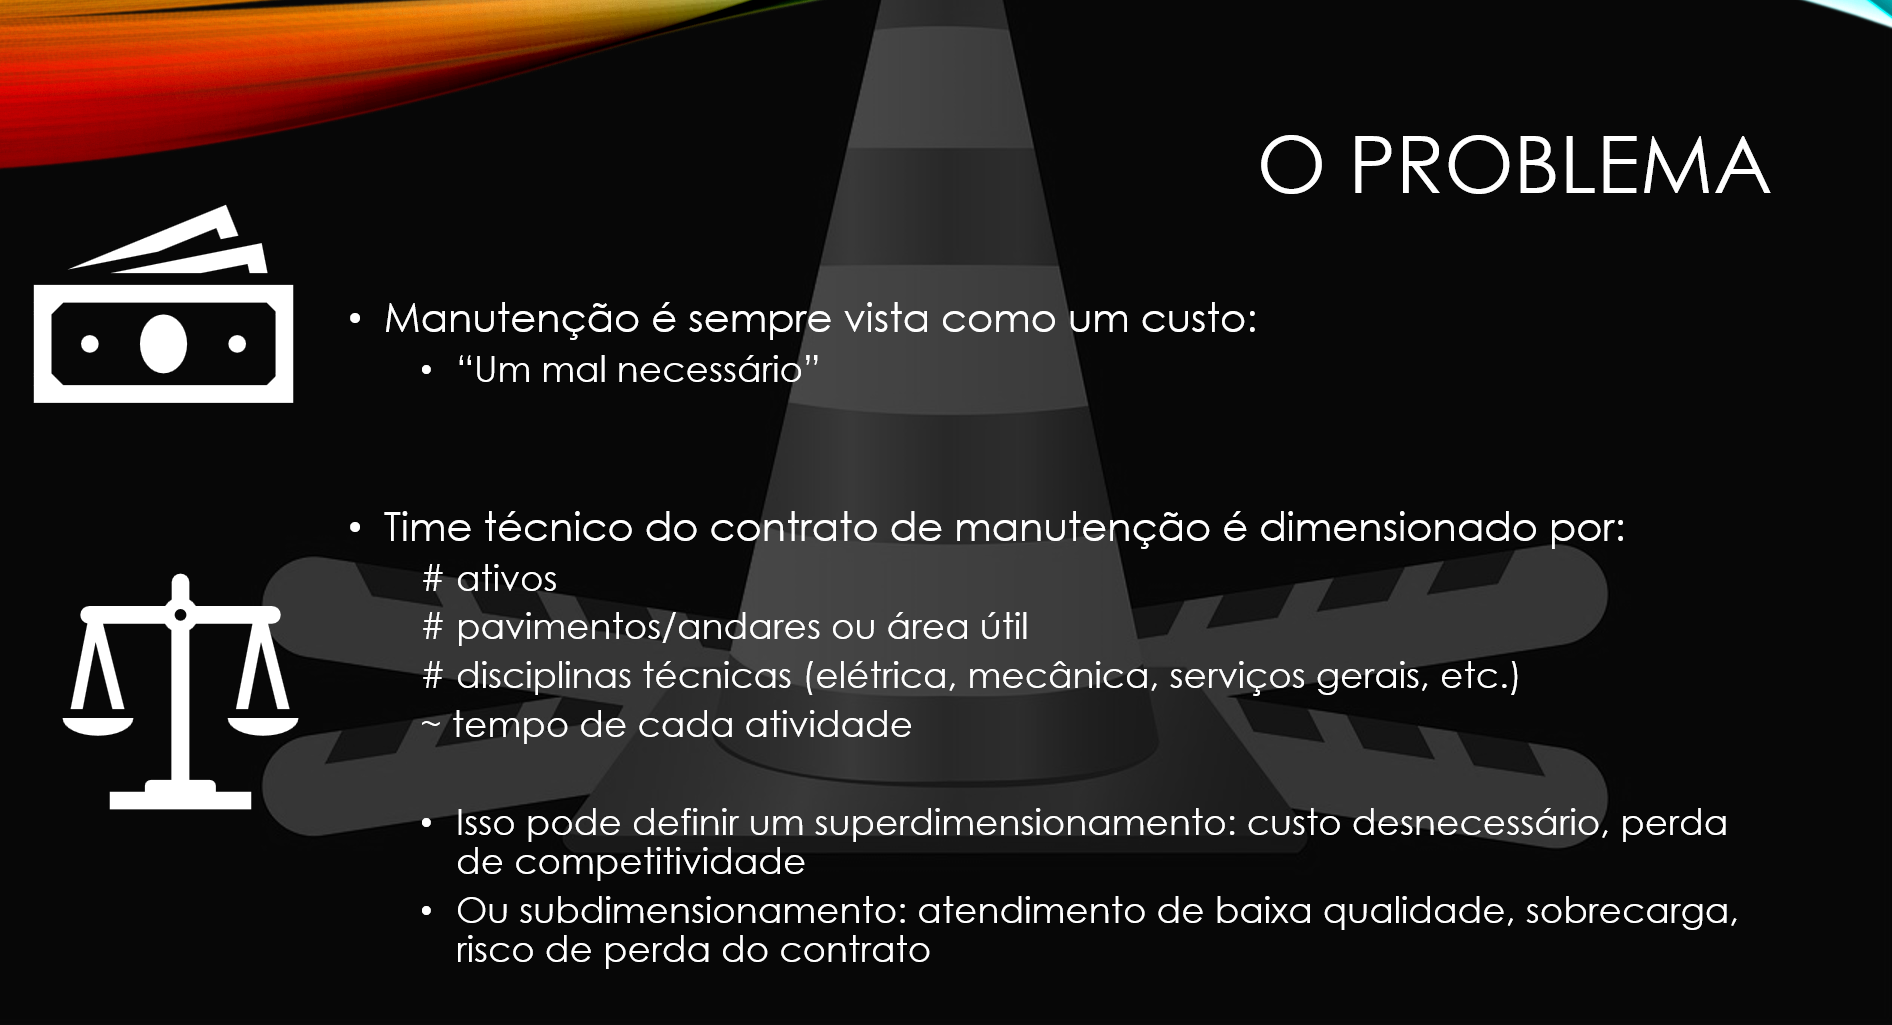

### Proposta de Pesquisa

![Proposta](pictures/Proposta.png)

### Os modelos, acurácias e demais informações são tratadas em um jupyter notebook separado.